<a href="https://colab.research.google.com/github/bondpapi/bondpapi/blob/main/Python_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open('Financial Report')

#rows of the data
data = wb.sheet1.get_all_values()
data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Full table with all data
pd.DataFrame.from_records(data)

#Dropping unnecessary columns
df = pd.DataFrame.from_records(data)
df.drop([1,2,3,4,8], axis = 'columns', inplace = True)
df

#Converting 1st row to header
df2 = df.rename(columns=df.iloc[0]).loc[1:]
df2

,Customer State,Average Spend,Average Freight,Revenue,Average Distance
1,AC,195.54,45.42,18794.36,2651.11
2,AL,193.66,38.06,94311.02,1855.32
3,AM,143.43,35.99,26553.75,2644.86
4,AP,191.06,39.41,16132.79,2596.62
5,BA,145.26,28.58,580797.7,1350.34
6,CE,164.31,35.21,263157.69,2193.24
7,DF,136.99,22.92,342838.02,834.15
8,ES,131.04,23.61,316111.53,801.37
9,GO,139.02,25.43,328754.13,774.82
10,MA,151.37,40.96,141557.56,2103.69


In [ ]:
df2.info()

Text(0, 0.5, 'Average Freight($)')

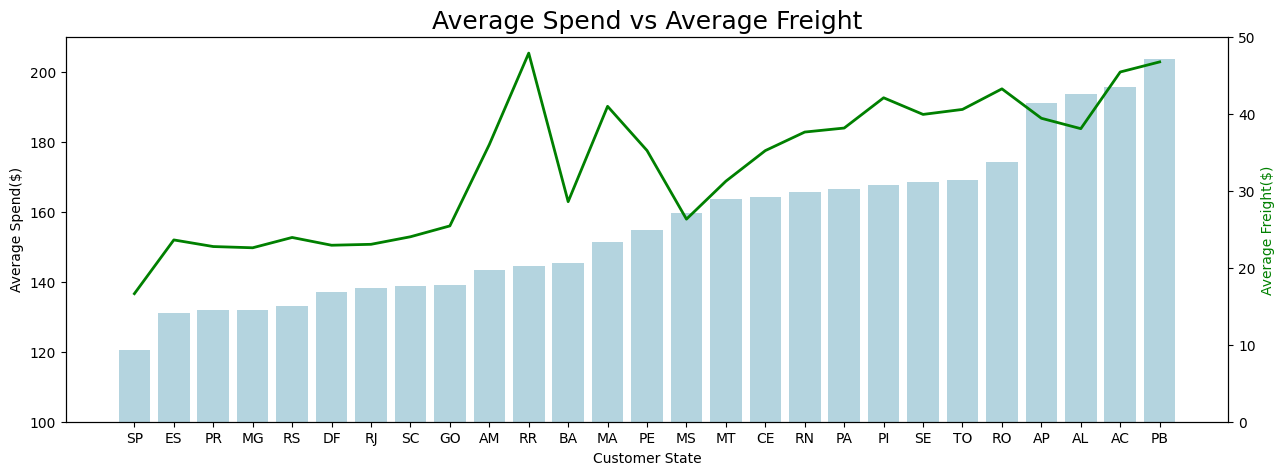

In [4]:
#Visualizing Average Spend vs Average Freight

#data preprocessing steps
df2['original_order'] = range(len(df2))
df2['Average Spend'] = pd.to_numeric(df2['Average Spend'], errors='coerce')
df2['Average Freight'] = pd.to_numeric(df2['Average Freight'], errors='coerce')
df2['Revenue'] = df2['Revenue'].astype(float)
df2['Average Distance'] = df2['Average Distance'].astype(float)

#sorting the dataframe by 'Average Spend'
df2_sorted = df2.sort_values(by='Average Spend')

fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.set_title('Average Spend vs Average Freight', fontsize=18)

#setting the limits for both y-axes
spend_range = [100, 210]
freight_range = [0, 50]

ax1.set_ylim(spend_range)
ax2.set_ylim(freight_range)

#plotting the data
sns.barplot(x=df2_sorted['Customer State'], y=df2_sorted['Average Spend'], ax=ax1, color='lightblue')
sns.lineplot(x=df2_sorted['Customer State'], y=df2_sorted['Average Freight'], ax=ax2, color='green', lw=2)

ax1.set_ylabel('Average Spend($)')
ax2.set_ylabel('Average Freight($)', color='green')


In [ ]:
df2.info()

Text(0, 0.5, 'Average Spend ($)')

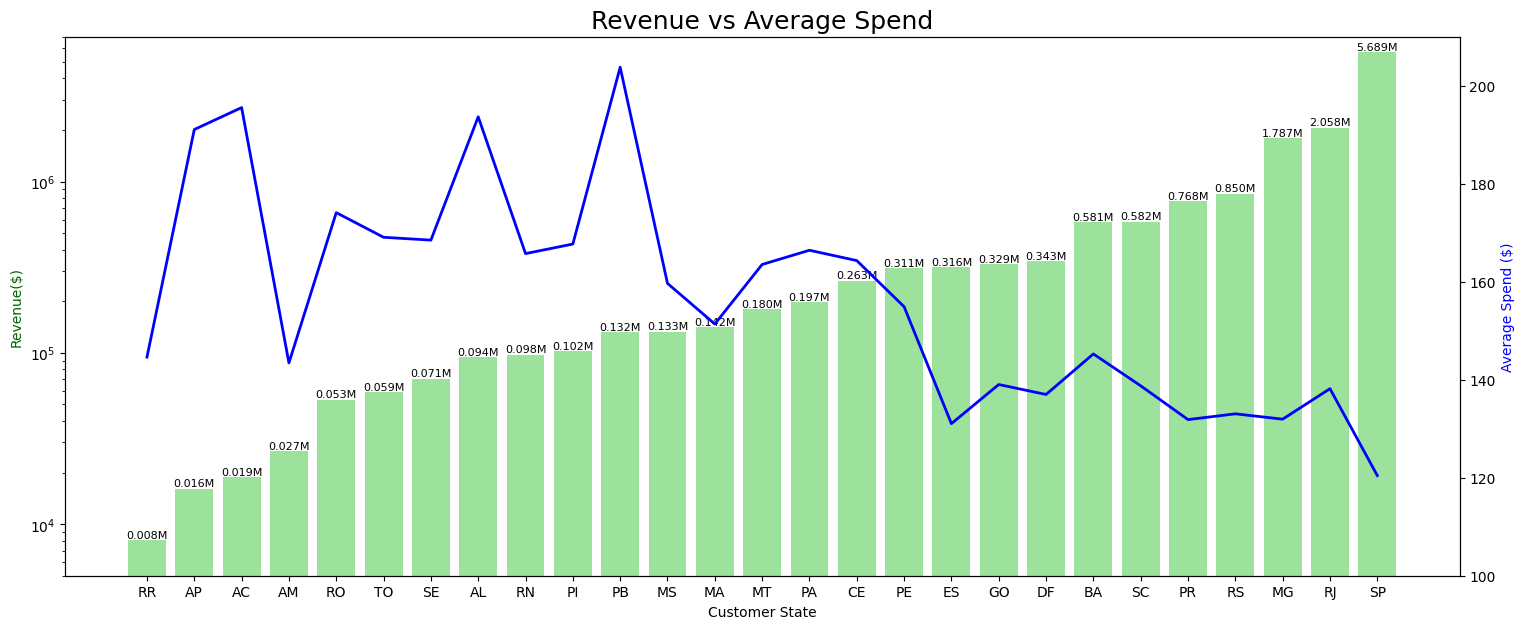

In [40]:
#Visualizing Revenue vs Average Spend

fig, ax1 = plt.subplots(figsize=(18,7))
ax2 = ax1.twinx()
ax1.set_title('Revenue vs Average Spend', fontsize=18)
df2_sorted = df2.sort_values(by='Revenue')

#setting the limits for both y-axes
revenue_range = [5e3, 7e6]
spend_range = [100, 210]

ax1.set_ylim(revenue_range)
ax2.set_ylim(spend_range)

#plotting the data
sns.barplot(x=df2_sorted['Customer State'], y=df2_sorted['Revenue'], ax=ax1, color='lightgreen')
sns.lineplot(x=df2_sorted['Customer State'], y=df2_sorted['Average Spend'], ax=ax2, color='blue', lw=2)

for i in ax1.containers:
    ax1.bar_label(i,fmt=lambda x: f'{x / 1000000:.3f}M',fontsize = 8)

ax1.set_yscale('log')
ax1.set_ylabel('Revenue($)', color='darkgreen')
ax2.set_ylabel('Average Spend ($)', color='blue')

Text(0, 0.5, 'Average Distance(km)')

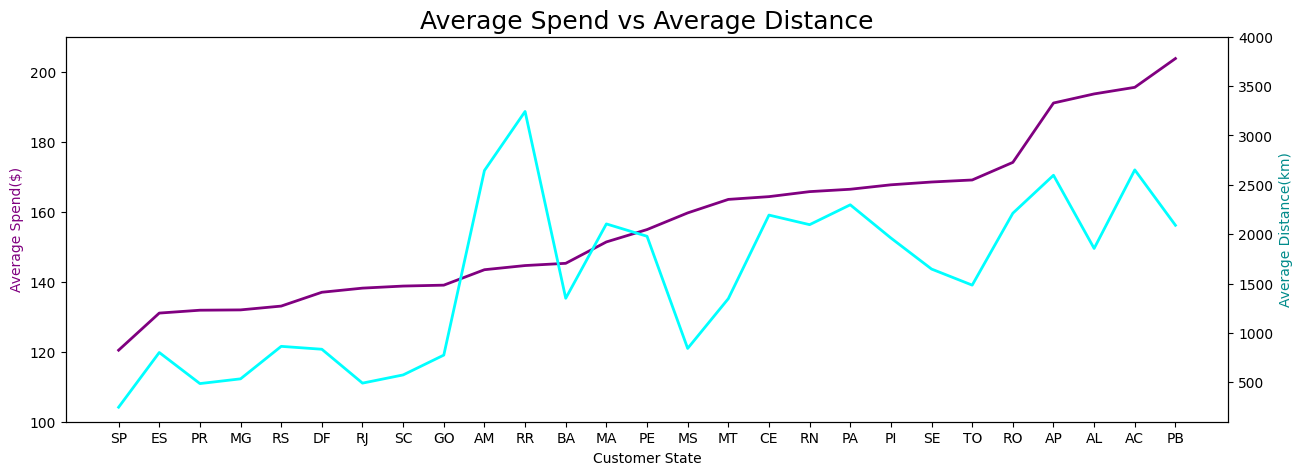

In [7]:
#Visualizing Average Spend vs Average Distance

fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.set_title('Average Spend vs Average Distance', fontsize=18)
df2_sorted = df2.sort_values(by='Average Spend')

#setting the limits for both y-axes
distance_range = [100, 4000]
spend_range = [100, 210]

ax1.set_ylim(spend_range)
ax2.set_ylim(distance_range)

#plotting the data
sns.lineplot(x=df2_sorted['Customer State'], y=df2_sorted['Average Spend'], ax=ax1, color='purple', lw=2)
sns.lineplot(x=df2_sorted['Customer State'], y=df2_sorted['Average Distance'], ax=ax2, color='cyan', lw=2)

ax1.set_ylabel('Average Spend($)', color='purple')
ax2.set_ylabel('Average Distance(km)', color='darkcyan')